<a href="https://colab.research.google.com/github/mralamdari/Computer-Vision-Projects/blob/main/Image_Segmentaion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import cv2
import sys
import skimage.io
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

tf.__version__

'2.9.2'

In [2]:
!git clone https://github.com/alsombra/Mask_RCNN-TF2

Cloning into 'Mask_RCNN-TF2'...
remote: Enumerating objects: 1004, done.
remote: Total 1004 (delta 0), reused 0 (delta 0), pack-reused 1004
Receiving objects: 100% (1004/1004), 137.72 MiB | 16.28 MiB/s, done.
Resolving deltas: 100% (588/588), done.
Updating files: 100% (76/76), done.


In [3]:
%cd Mask_RCNN-TF2

/content/Mask_RCNN-TF2


In [4]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 KB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.0/121.0 KB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 KB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 KB 8.4 MB/s eta 0:00:00


In [5]:
!python setup.py install

/usr/local/lib/python3.8/dist-packages/setuptools/dist.py:697: UserWarning: Usage of dash-separated 'description-file' will not be supported in future versions. Please use the underscore name 'description_file' instead
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/setuptools/dist.py:697: UserWarning: Usage of dash-separated 'license-file' will not be supported in future versions. Please use the underscore name 'license_file' instead
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/setuptools/dist.py:697: UserWarning: Usage of dash-separated 'requirements-file' will not be supported in future versions. Please use the underscore name 'requirements_file' instead
  warnings.warn(
running install
running bdist_egg
running egg_info
creating mask_rcnn.egg-info
writing mask_rcnn.egg-info/PKG-INFO
writing dependency_links to mask_rcnn.egg-info/dependency_links.txt
writing top-level names to mask_rcnn.egg-info/top_level.txt
writing manifest file 'mask_rcnn.egg-info/SOURCES.txt'


In [6]:
%cd /content
ROOT_DIR = os.path.abspath('./Mask_RCNN-TF2')
ROOT_DIR

/content


'/content/Mask_RCNN-TF2'

In [7]:
sys.path

['/content',
 '/env/python',
 '/usr/lib/python38.zip',
 '/usr/lib/python3.8',
 '/usr/lib/python3.8/lib-dynload',
 '',
 '/usr/local/lib/python3.8/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.8/dist-packages/IPython/extensions',
 '/root/.ipython']

In [8]:
sys.path.append(ROOT_DIR)
sys.path

['/content',
 '/env/python',
 '/usr/lib/python38.zip',
 '/usr/lib/python3.8',
 '/usr/lib/python3.8/lib-dynload',
 '',
 '/usr/local/lib/python3.8/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.8/dist-packages/IPython/extensions',
 '/root/.ipython',
 '/content/Mask_RCNN-TF2']

In [9]:
from mrcnn import utils
from mrcnn import visualize
import mrcnn.model as modellib

In [10]:
# https://cocodataset.org/#home
sys.path.append(os.path.join(ROOT_DIR, 'samples/coco/'))

In [11]:
import coco

MODEL_DIR = os.path.join(ROOT_DIR, 'logs')
IMAGE_DIR = os.path.join(ROOT_DIR, 'images')

In [12]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [13]:
COCO_MODEL_PATH = os.path.join(ROOT_DIR, 'mask_rcnn_coco.h5')
COCO_MODEL_PATH

'/content/Mask_RCNN-TF2/mask_rcnn_coco.h5'

In [14]:
utils.download_trained_weights(COCO_MODEL_PATH)

... done downloading pretrained model!


In [15]:
class InferenceConfig(coco.CocoConfig):
  GPU_COUNT = 1
  IMAGES_PER_GPU = 1

In [16]:
config = InferenceConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                93
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

In [17]:
network = modellib.MaskRCNN(mode='inference', model_dir=MODEL_DIR, config=config)

Instructions for updating:
Use fn_output_signature instead


In [18]:
network.load_weights(COCO_MODEL_PATH, by_name=True)

##Detecting objects

In [19]:
class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']

len(class_names)

81

In [20]:
class_names[21], class_names.index('elephant')

('elephant', 21)

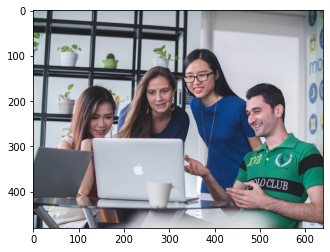

In [22]:
image = skimage.io.imread('/content/3.jpg')
plt.imshow(image)

In [23]:
results = network.detect([image], verbose=1)
results

Processing 1 images
image                    shape: (480, 640, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


/usr/local/lib/python3.8/dist-packages/keras/engine/training_v1.py:2067: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


[{'rois': array([[164, 410, 475, 638],
         [ 84, 328, 434, 497],
         [280, 128, 432, 355],
         [381, 250, 436, 318],
         [ 74,  53, 125, 107],
         [169,  48, 425, 188],
         [163,  52, 229,  95],
         [131, 118, 408, 349],
         [ 76, 262, 129, 309],
         [410,   0, 475, 190],
         [302,   0, 465, 162],
         [305,   0, 470, 553],
         [302,   2, 418, 133],
         [106, 263, 129, 301]], dtype=int32),
  'class_ids': array([ 1,  1, 64, 42, 59,  1, 59,  1, 59, 57, 57, 61, 64, 76],
        dtype=int32),
  'scores': array([0.9996471 , 0.9992822 , 0.99707246, 0.9952136 , 0.9923258 ,
         0.9899698 , 0.98753834, 0.9744048 , 0.95297384, 0.8974374 ,
         0.862673  , 0.8324188 , 0.8022683 , 0.79414517], dtype=float32),
  'masks': array([[[False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False],
          ...,
          [False, F

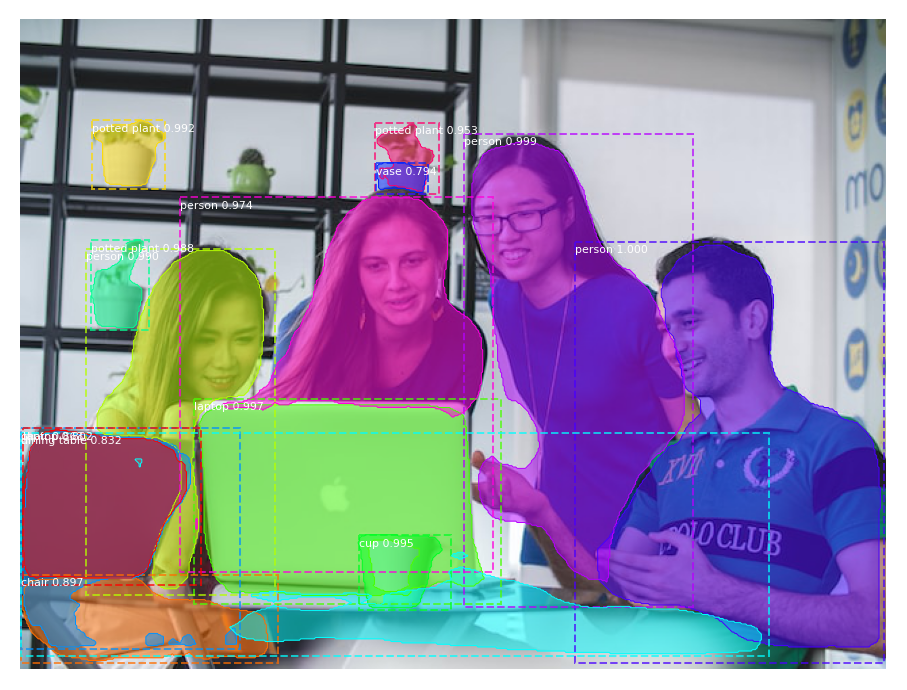

In [24]:
visualize.display_instances(image, 
                            results[0]['rois'],
                            results[0]['masks'],
                            results[0]['class_ids'],
                            class_names,
                            results[0]['scores'])

#Removing the background

In [25]:
np.unique(results[0]['masks'], return_counts=True)

(array([False,  True]), array([4121532,  179268]))

In [32]:
def segment(image, results, index):
  mask = results['masks'][:, :, index]

  mask = np.stack((mask,)*3, axis=-1)

  mask = mask.astype('uint8')

  background = 255 - mask*255

  mask_show = np.invert(background)

  mask_img = image * mask

  res = mask_img + background

  return res, mask_show

In [33]:
segmentation, mask_obj = segment(image, results[0], 0)

In [34]:
segmentation

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [35]:
mask_obj

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [54]:
def show_segment(image, results, index, name, show_mask=False):
  segmentation, mask_obj = segment(image, results, index)
  plt.subplots(1, figsize=(16, 16))
  plt.axis('off')
  plt.title(name)
  if show_mask:
    plt.imshow(np.concatenate([mask_obj, segmentation], axis=1))
  else:
    plt.imshow(np.concatenate([image, segmentation], axis=1))

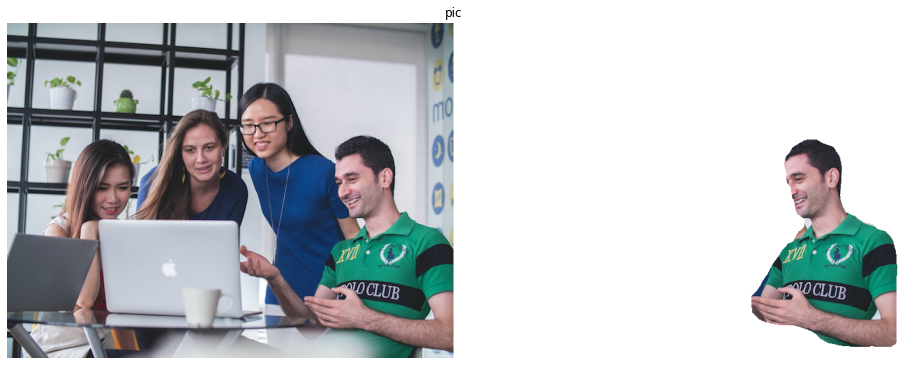

In [57]:
show_segment(image, results[0], 0, 'pic', False)

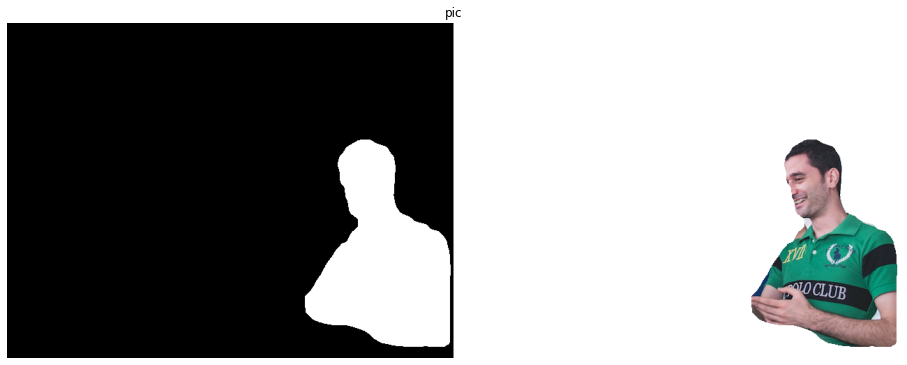

In [58]:
show_segment(image, results[0], 0, 'pic', True)

In [49]:
results[0]['rois']

array([[164, 410, 475, 638],
       [ 84, 328, 434, 497],
       [280, 128, 432, 355],
       [381, 250, 436, 318],
       [ 74,  53, 125, 107],
       [169,  48, 425, 188],
       [163,  52, 229,  95],
       [131, 118, 408, 349],
       [ 76, 262, 129, 309],
       [410,   0, 475, 190],
       [302,   0, 465, 162],
       [305,   0, 470, 553],
       [302,   2, 418, 133],
       [106, 263, 129, 301]], dtype=int32)

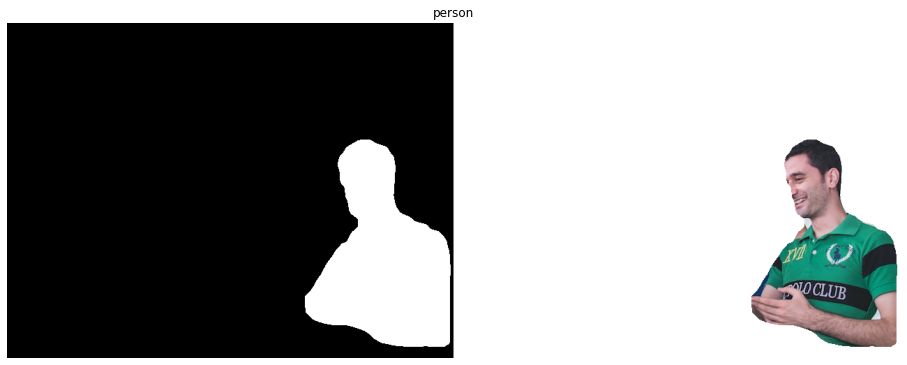

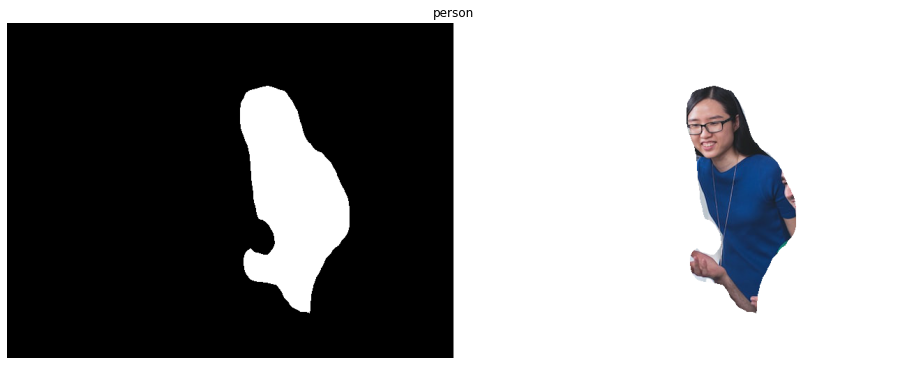

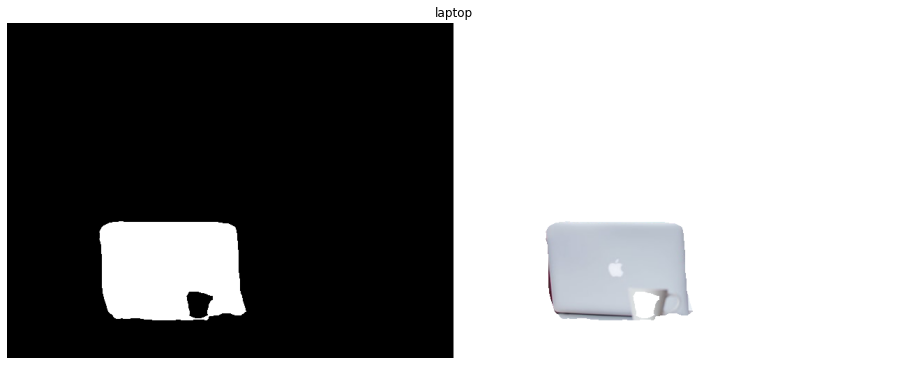

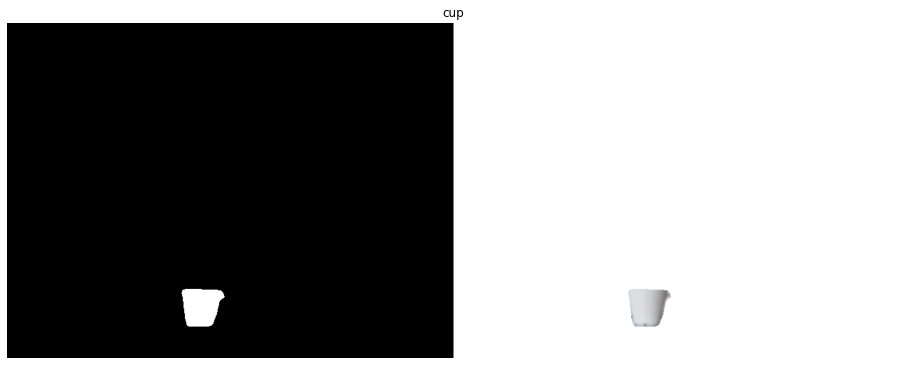

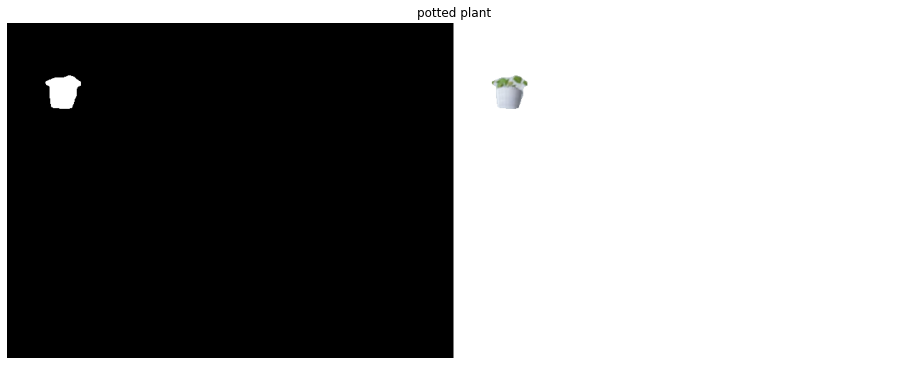

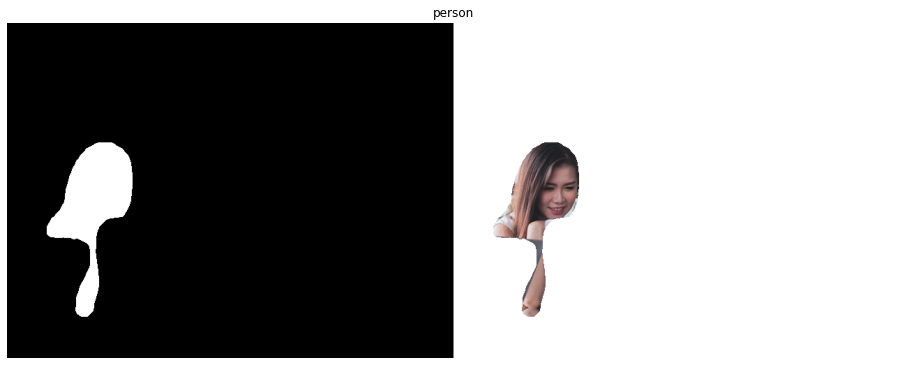

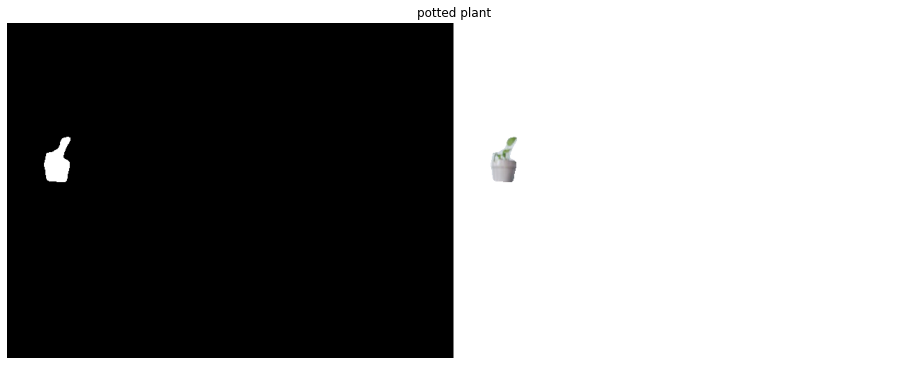

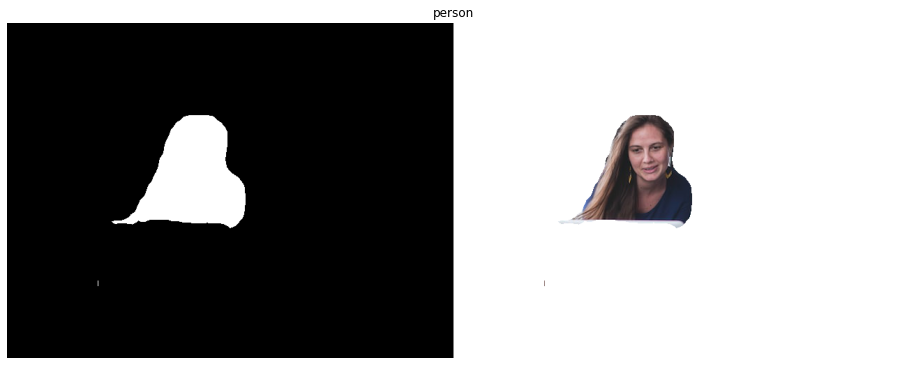

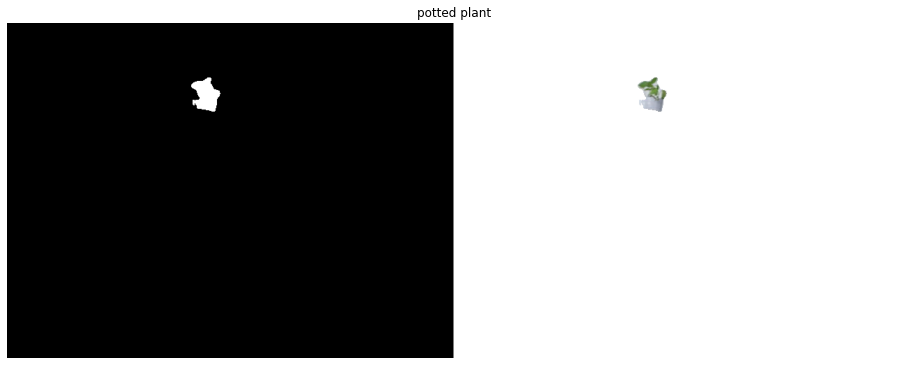

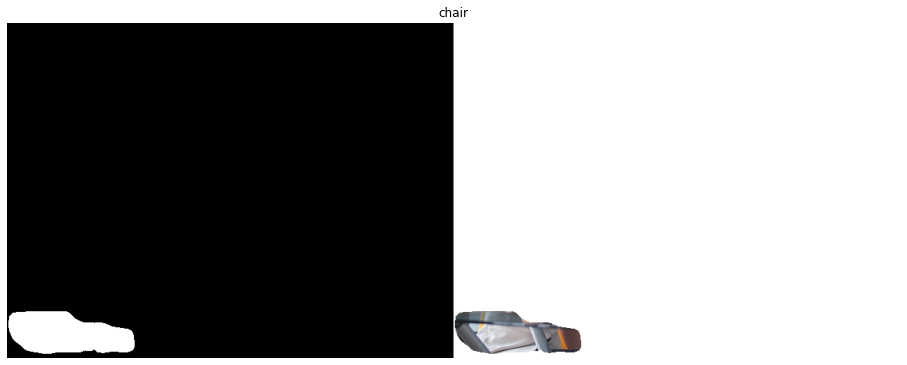

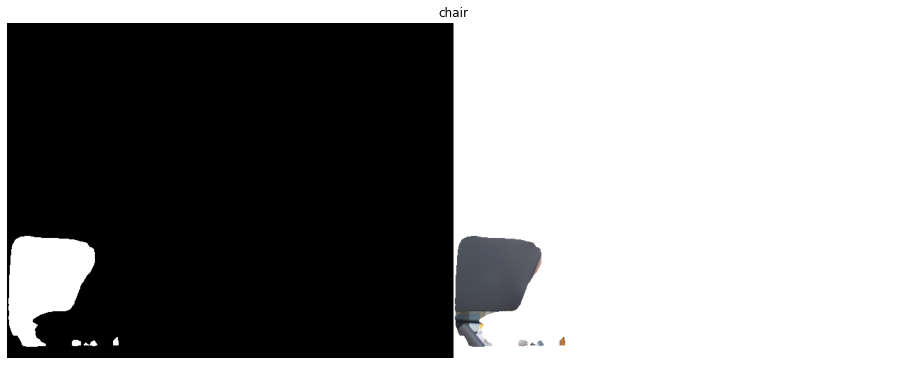

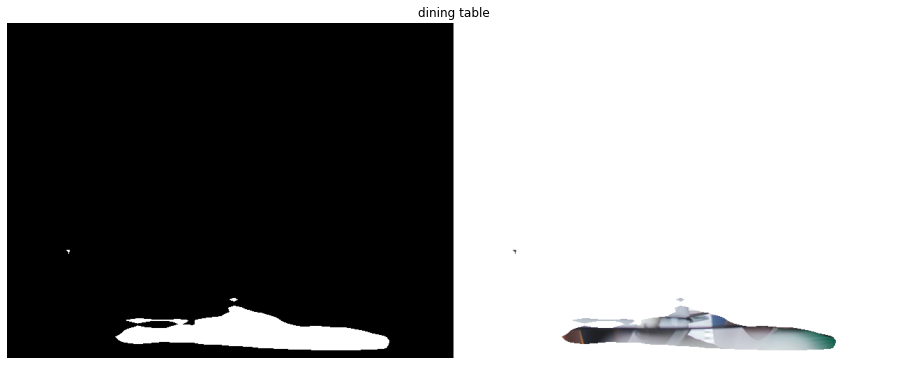

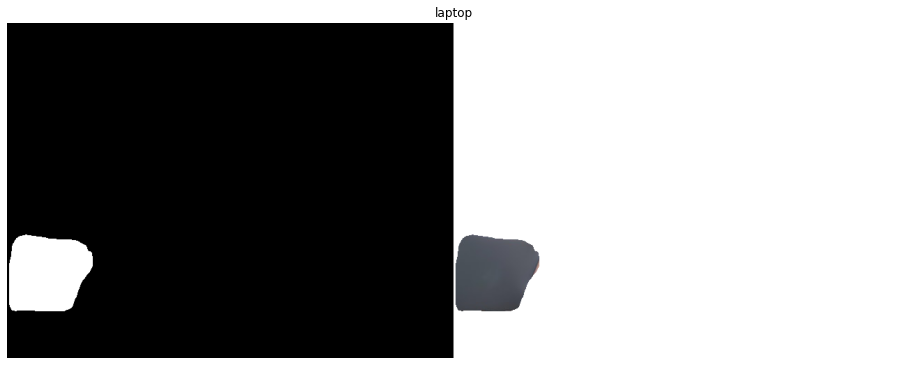

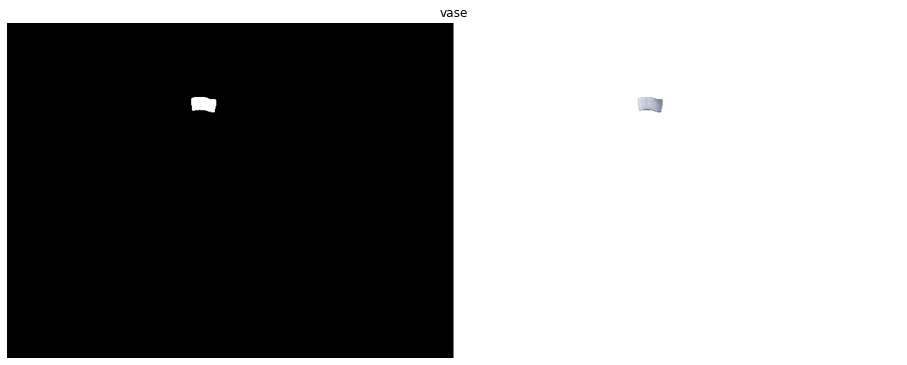

In [60]:
for index in range(len(results[0]['rois'])):
  show_segment(image, results[0], index, class_names[results[0]['class_ids'][index]], True)